In [ ]:
import pandas as pd

df = pd.read_csv("/content/dbscan_dataset.csv")

df.head()
# dataset contains just two features that we will perform DBSCAN on to cluster the data

,feature_1,feature_2
0,5.020077,2.583755
1,3.232367,1.195353
2,-6.107928,-9.728652
3,5.199669,3.053950
4,1.380819,4.593374


In [ ]:
# first, let's make sure to apply a scaler since DBSCAN is distance-based
from sklearn.preprocessing import StandardScaler

X = df[["feature_1", "feature_2"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Overview:**  
DBSCAN is a density-based clustering algorithm that groups together points that are closely packed, while marking points that lie alone in low-density regions as outliers (noise). It does not require specifying the number of clusters beforehand, unlike K-Means.

**Key Concepts:**
- **Epsilon (`eps`)**: The maximum distance between two points for them to be considered neighbors.
- **MinPts (`min_samples`)**: The minimum number of points required to form a dense region (core point).
- **Core Point**: A point with at least `min_samples` points within `eps` distance.
- **Border Point**: A point within `eps` distance of a core point but with fewer than `min_samples` neighbors itself.
- **Noise Point**: A point that is not a core or border point; considered an outlier.

**How it Works:**
1. For each point in the dataset, DBSCAN checks if it is a core point (has enough neighbors within `eps` distance).  
2. If it is a core point, a new cluster is started (or the point is added to an existing cluster).  
3. All directly reachable points (within `eps`) from the core point are added to the cluster.  
4. The algorithm expands the cluster by recursively adding neighbors of neighbors that meet the density requirement.  
5. Points that do not belong to any cluster are labeled as noise.

**Advantages:**
- Can find arbitrarily shaped clusters.
- Does not require specifying the number of clusters in advance.
- Can identify outliers (noise points).

**Disadvantages:**
- Performance can degrade with high-dimensional data.
- Sensitive to the choice of `eps` and `min_samples`.

**Typical Use Case:**  
DBSCAN is excellent for datasets where clusters have irregular shapes or when outlier detection is important.


In [ ]:
# now, let's perform DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
# eps controls the maximum distance between two points for them to be considered neighbors
# min_samples is the min number of points needed to form a dense cluster

labels = dbscan.fit_predict(X_scaled)

df['dbscan_label'] = labels # add cluster labels to df

df.head()

,feature_1,feature_2,dbscan_labels,dbscan_label
0,5.020077,2.583755,0,0
1,3.232367,1.195353,0,0
2,-6.107928,-9.728652,1,1
3,5.199669,3.053950,0,0
4,1.380819,4.593374,0,0


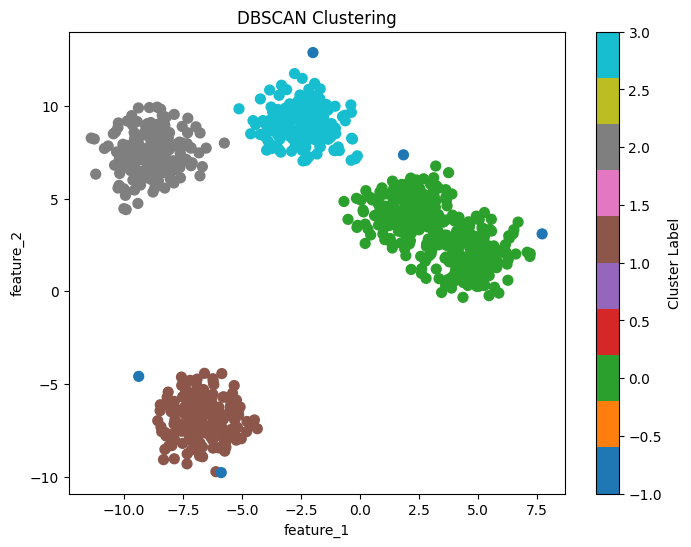

In [ ]:
# now, let's plot a scatter plot with the points colored by their cluster labels
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['feature_1'], df['feature_2'], c=df['dbscan_label'], cmap='tab10', s=50)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

# shows 2 different clusters that are well separated and roughly circular/elliptical in shape

In [ ]:
# now, let's count the clusters and noise points
labels = dbscan.labels_

# number of clusters, ignoring noise if present (-1 label)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# number of noise points
n_noise = list(labels).count(-1)

print(f"Number of clusters detected: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters detected: 4
Number of noise points: 5
